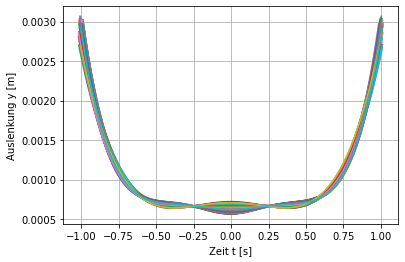

In [3]:
import numpy as np
import csv
import matplotlib.pyplot as plt

lst = []
N = 100
#fileNameBase = "C:/Users/corli/Documents/Studium/TIB " \
#           "7/bachelor_arbeit_corlito_roberto_ws20/BA_RC_Daten_Old/UeberholvorgangwoNoise100Samples/Daten" \
#           "/dataSynthesizedUeberholvorgang"

fileNameBase = "C:/Users/corli/Documents/Studium/TIB " \
           "7/bachelor_arbeit_corlito_roberto_ws20/BA_RC_Daten/SinusfunktionBaseline/Datensatz" \
           "/dataSynthesizedSinusfunktion"

#fileNameBase = "C:/Users/corli/Documents/Studium/TIB " \
#           "7/bachelor_arbeit_corlito_roberto_ws20/BA_RC_Daten/Ueberholvorgang/Datensatz" \
#           "/dataSynthesizedUeberholvorgang"

for i in range(N):
    filename = fileNameBase + str(i) + ".csv"
    with open(filename, newline='') as f:
        reader = csv.reader(f)
        for row in reader:
            row.pop(0)
            lst.append(row)

arr = np.asarray(lst)
arr = arr.astype(np.float)

fig = plt.figure()
ax = plt.axes()

j = 0
for i in range(N):
    ax.plot(arr[i + j], arr[i + 1 + j])
    j = j + 1
    
plt.grid()
plt.xlabel("Zeit t [s]")
plt.ylabel("Auslenkung y [m]")
plt.show()

def kullback_leibler_kumu(p,q):
    return np.where(q != 0, p * np.log(p / q), 0)

def kullback_leibler(p,q):
    kl_vals = np.where(q != 0, p * np.log(p / q), 0)
    kl_div = np.sum(kl_vals)
    max_val = np.max(kl_vals)
    max_gradient = np.max(np.gradient(kl_vals))
    return kl_div, max_val, max_gradient

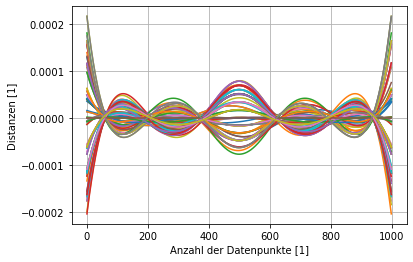

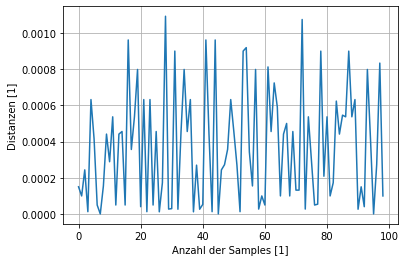

In [4]:
fig = plt.figure()
ax = plt.axes()
#fig2 = plt.figure()
#ax2 = plt.axes()
p = arr[1]
kl = []
kl_kumu = []
kltmp = 0
x = []
x_kumu = []
j = 0

for i in range(3, 2*N, 2):
    q = arr[i]
    #print(q.sum())
    for ii in range(len(p)):
        kltmp = kullback_leibler_kumu(p[ii],q[ii])
        kl_kumu.append(kltmp)
        x_kumu.append(ii)
    kl_div, max_val, max_gradient = kullback_leibler(p,q)
    kl.append(kl_div)
    ax.plot(x_kumu,kl_kumu)
    kl_kumu = []
    x_kumu = []
    x.append(j)
    j = j + 1
plt.grid()
plt.xlabel("Anzahl der Datenpunkte [1]", fontsize=10)
plt.ylabel("Distanzen [1]", fontsize=10)
#ax.tick_params(axis='both', which='major', labelsize=10)
#ax.tick_params(axis='both', which='minor', labelsize=8)
#plt.title("Distanzen", fontsize=12)
plt.show()
fig.savefig("SinKLEinzel.pdf", bbox_inches='tight', transparent=True)

fig = plt.figure()
ax = plt.axes()
ax.plot(x,kl)
plt.grid()
plt.xlabel("Anzahl der Samples [1]", fontsize=10)
plt.ylabel("Distanzen [1]", fontsize=10)
#ax.tick_params(axis='both', which='major', labelsize=10)
#ax.tick_params(axis='both', which='minor', labelsize=8)
#plt.title("Kullback-Leibler Distanzen", fontsize=12)
#ax.set_xlim((x.min(), x.max()))
#ax.set_ylim((y.min(), y.max()))
fig.patch.set_alpha(0.)
ax.patch.set_alpha(0.)
plt.show()
fig.savefig("SinKLK.pdf", bbox_inches='tight', transparent=True)